# MuMoT User Manual
## Multiscale Modelling Tool

This is the user manual for [MuMoT](https://github.com/DiODeProject/MuMoT), a software tool developed at the University of Sheffield as part of the [DiODe](http://diode.group.shef.ac.uk) project

*Current MuMoT version*: **0.0**

## Working with MuMoT

MuMoT runs inside [Jupyter notebooks](http://jupyter.org) - since you are reading this User Manual you have presumably already installed Jupyter, or are using an installation provided to you

Next, you need to install MuMoT itself; since MuMoT is a Python package it can be installed from PyPi - see the [project page](https://diodeproject.github.io/MuMoT/) for more details

To run commands in 'Code' cells it's usually easiest just to hit `Shift + Enter`; here is some basic information on [working with Jupyter notebooks](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Notebook%20Basics.html)

With Jupyter and MuMot both installed, you simply need to import the MuMoT package into your notebook; we recommend you refer to it as `mmt`

In [1]:
import MuMoT.MuMoT as mmt

Created `%%model` as an alias for `%%latex`.


## Defining your first model

If everything went well with importing MuMoT you should have seen the message

``Created `%%model` as an alias for `%%latex``

MuMoT models are defined using the `%%model` keyword within a cell, and have a very simple syntax; since MuMoT works with *chemical kinetic* or *reaction kinetic* models, you simply have to describe the reactions that take place, and the rates with which they occur. For example

`A + A -> A + U: s`

is a very simple reaction, in which two particles of type $A$ interact, and one changes to type $U$, at rate $s$

These kind of reaction rules are quite general; they describe a lot of chemical reactions, as well as collective behaviour in which individuals interact to change each other's state, and even demographic models in which individuals are born and die

Our first model will be based on signalling behaviour observed in honeybee swarms, as described in the following papers:
* Seeley, T.D, Visscher, P.K. Schlegel, T., Hogan, P.M., Franks, N.R. & Marshall, J.A.R. (2012) [Stop signals provide cross inhibition in collective decision-making by honeybee swarms](http://www.sciencemag.org/content/335/6064/108.full.pdf). *Science* **335**, 108-111
* Pais, D., Hogan, P.M., Schlegel, T., Franks, N.R., Leonard, N.E. & Marshall, J.A.R. (2013) [A mechanism for value-sensitive decision-making](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0073216).  *PLoS one* **8**(9), e73216

The `$` at the start and end just allow us to use LaTeX [codes](http://reu.dimacs.rutgers.edu/Symbols.pdf) for our state and rate labels, allowing us to use  letters from different alphabets, such as Greek, and other nice formatting - if you don't know LaTeX don't worry about this - leave in the `$` signs, they won't hurt

**N.B.** currently it is important to put spaces between all elements of each rule, as below

OK, here we go...

In [2]:
%%model
$
U -> A : g_A
U -> B : g_B
A -> U : a_A
B -> U : a_B
A + U -> A + A : r_A
B + U -> B + B : r_B
A + B -> A + U : s
A + B -> B + U : s
$

<IPython.core.display.Latex object>

Now we have our model, and Jupyter should have reprinted the rules underneath the cell you input them in

You can see that actually the `_` code enables you to use subscripts, which can be handy for distinguishing related rates - in this model there are two distinct nest sites for the honeybee swarm to choose between, *A* and *B*, and rates associated with each one

We have our model, but currently it is not useful; it's only a definition, not a fully-fledged model that we can start analysing with MuMoT. To make one of those we have to use the `parseModel` command; we simply pass in a reference to the cell where we defined our model...

In [3]:
model1 = mmt.parseModel(In[2])

If there is no output from `parseModel` that is good news - it means the model was valid. Now we have an object, which we called `model1`, which is a version of the model that we can start doing useful work with. For example, we can see its 'reactants' (or states, or types of individual; remember the terminology comes from chemical reactions)...

In [4]:
model1.showReactants()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

...and the rates the reactions happen at

In [5]:
model1.showRates()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Note that here MuMoT also helpfully tells us which reactions in the original model definition each rate is associated with

We can also look at the reaction equations in a slightly nicer format...

In [6]:
model1.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

We can even see a simple figure representing our model...

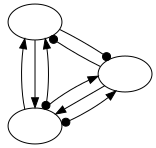

In [7]:
model1.visualise()

This figure attempts to represent the nature of the interactions between reactants graphically, from simple transitions (arrows), inhibitions (filled circles) and induced switches (arrows with filled circles at the origin); to understand the different interaction patterns try relating the arrows with the reactions we defined above, by reference to the rates they are labelled with

## Exploring your new model

If you want to know what commands you can send to an object, Jupyter lets you type out the object name, then a `.`, then hit `Tab` to see a list of accepted commands. You can also consult the [Command reference](#comreference) for a full list of commands, and details on their use

One commmand that looks intruiguing is `showODEs`

In [8]:
model1.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

This is where things start getting interesting, because equations are what mathematicians analyse. `showODEs` shows the model's Ordinary Differential Equations, which describe how the populations of reactants in the model change over time. MuMoT has derived these equations for you automatically, from your description of the reactions. If you are familiar with ODEs then you should be able to read these quite easily. However even if you are not, you can still work with them

So, what analysis can we do in MuMoT now we've found our ODEs?

Well, we might want to look at how the state of the system (the proportions of the different reactants) change on average over time...

...but before we can do that, we need to let MuMoT know that this is actually a simpler set of equations than it appears to be. $A$, $B$, and $U$ represent states that honebees can be in during the swarming process, either committed to site *A*, committed to site *B*, or *U*ncommitted. Because there is a constant number of individuals in the swarm during a decision, one of these equations is redundant; the change in the uncommitted bee frequency can be worked out from the change in frequencies of A-committed and B-committed bees, for example

We let MuMoT know this by defining one of the reactants in terms of the other, using `substitute`

In [9]:
model2 = model1.substitute('U = N - A - B')

Now we have a simplified model, `model2`, which only has two equations, because we have told MuMoT that the total number of uncommitted bees $U$ is the total number of bees in the swarm $N$, minus the numbers committed to the two different nests ($A$ and $B$)

In [10]:
model2.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Now we can look at how the model behaves, by asking for a vector plot of the two reactants $A$ and $B$...

<IPython.core.display.Javascript object>


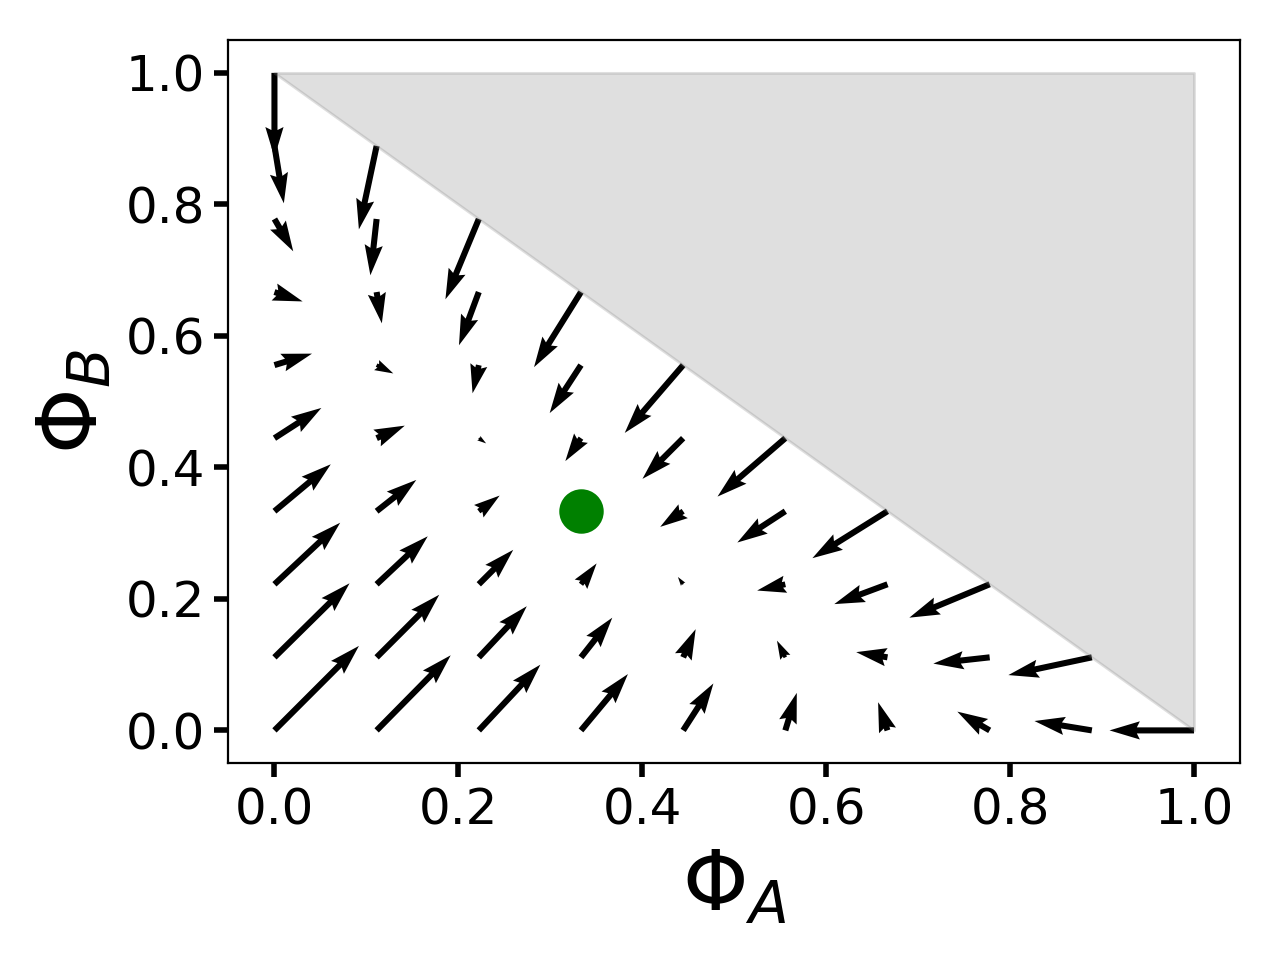

In [11]:
vector1 = model2.vector('A', 'B')

Now we can see how to start working with models in MuMoT. The figure you see is a vector plot, which shows on average how the state of the system (proportions of bees in states $A$ and $B$) will change over time, from any point in the state space. The arrows give the direction the system will move in, and their lengths show how fast. Because the total number of bees is constant, $A+B$ can never exceed 1, so the top right hand triangle of the figure is greyed out; these are impossible states. The number of uncommitted bees $U$, which we hid away earlier, is not shown, but it is simply $1-A-B$. But what we really care about in a decision-making process is how the number of 'voters' for the competing options changes over time

You will also notice that there are some sliders above the figure; MuMoT gives you a slider for every rate in the model, and by changing their values, you can see what happens to the behaviour of the system

Jupyter also lets you interact nicely with the figure; you can zoom in, back out, pan around, and save, all by clicking the icons that appear underneath it. If you want to save a figure for a paper, simply click the disk icon. And if while exploring the model you find a nice figure, you can click the 'off' icon in its top right to snapshot it, and generate a new interactive figure to play with. You can then simply right-click your snapshots to save them from your browser - just don't forget to note the parameters that generated them - you can find that out by looking at the logs... later in the manual we will see how to take notes properly to reproduce analyses (see [Bookmarking](#bookmarking))

Every 'controller' in MuMoT keeps a log of everything it's been asked to do; we called our controller `vector1` when we created it, so it is easy to check what it has been up to... (WARNING: if you have been playing with the sliders a lot, there could be a lot in the logs! To only see the last few entries we set the `tail` argument to `True`; if `tail` is not set it will be assumed to be `False`)

In [12]:
vector1.showLogs(tail = True)

Showing last 2 of 2 log entries:
Starting 2d vector plot with parameters (a_{A}=0.5), (a_{B}=0.5), (g_{A}=0.5), (g_{B}=0.5), (r_{A}=0.5), (r_{B}=0.5), (s=0.5), at 2017-11-03 16:51:39.435244
Fixed point1: {A: -1.00000000000000, B: -1.00000000000000} with eigenvalues: [2.00000000000000, 1.00000000000000]
Fixed point2: {A: 0.333333333333333, B: 0.333333333333333} with eigenvalues: [-2.00000000000000, -0.333333333333333]


For papers and presentations we can produce somewhat prettier plots similar to figure 1 above, using `stream`. But before we do that, one unfortunate thing about our `vector1` controller is that there are just too many sliders. We might choose to describe all the rates (*a*bandonment, *r*ecruitment (via the waggle dance), and individual discovery and commitment (*g*)) in terms of the *v*alues of the nest sites... we can do this by using `substitute` again

In [13]:
model3 = model2.substitute('a_A = 1/v_A, a_B = 1/v_B, g_A = v_A, g_B = v_B, r_A = v_A, r_B = v_B')

Our new model is a little simpler, with just three rates, $v_A$, $v_B$ and $s$

In [14]:
model3.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Still, in decision-making what we really care about is how good options are on average, and their difference in value. Pais et al. (2013) thus defined option values in terms of deviation from the average value, so
$$\displaystyle v_A=\mu+\frac{\Delta}{2}$$
and
$$\displaystyle v_B=\mu-\frac{\Delta}{2}$$

In [15]:
model4 = model3.substitute('v_A = \mu + \Delta/2, v_B = \mu - \Delta/2')
model4.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

This model is much easier to interact with...

<IPython.core.display.Javascript object>


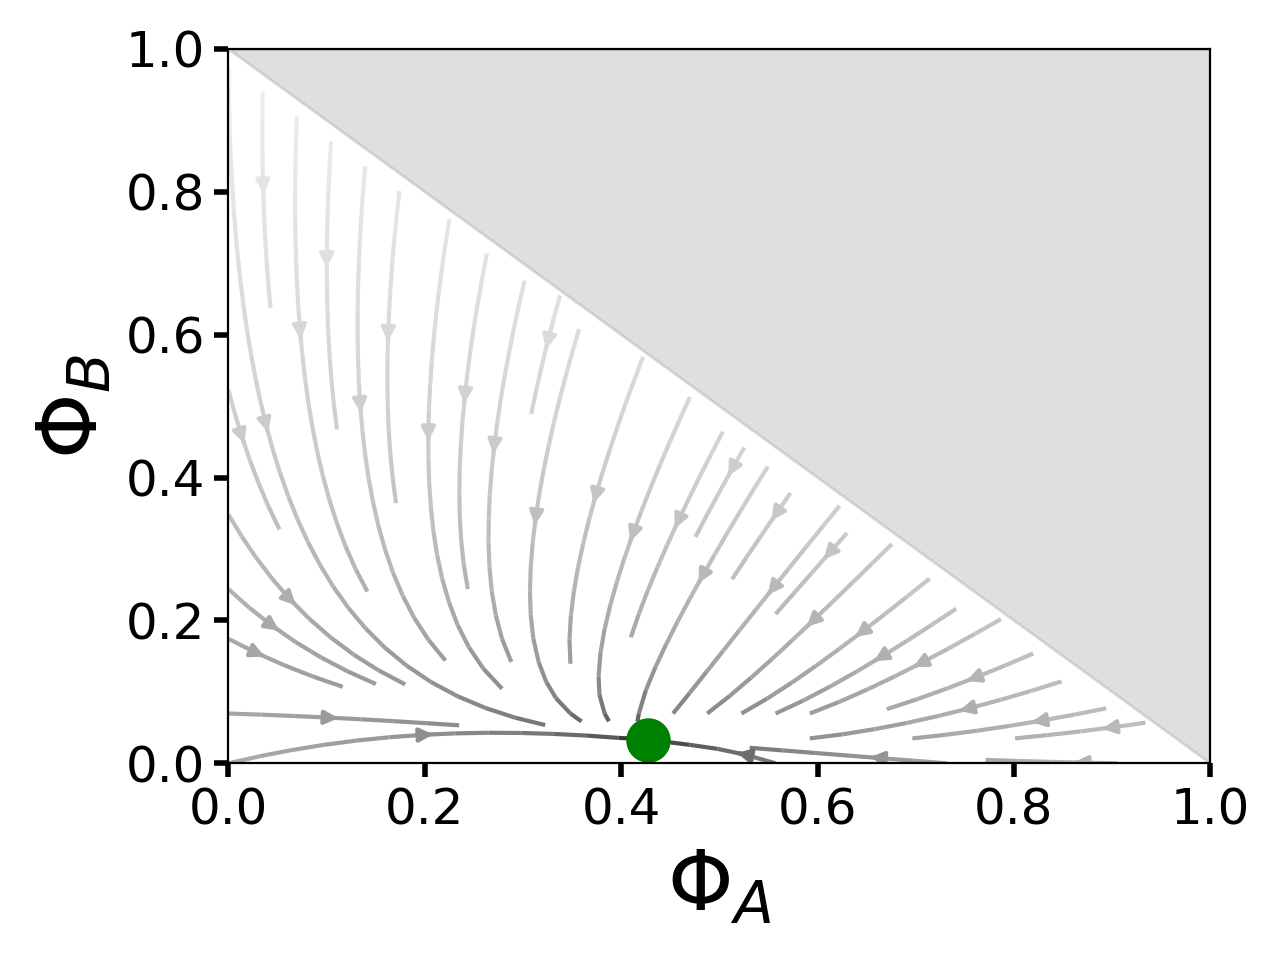

In [16]:
stream1 = model4.stream('A','B', showFixedPoints = True)

A `stream` plot is just like a `vector` plot, except now lines show the average change of the system over time in more detail, and their shading represents the speed of change, from slow (light grey) to fast (black)

Note also that here we added a *keyword argument* `showFixedPoints = True` - this can also be applied to `vector` plots, and plots the stationary points of the equation. If the stationary point is *stable* (arrows converge on that point) then it is represented with a filled circle, and if it is *unstable* (arrows leave that point) then a hollow circle is shown. Displaying fixed points can slow down plots, so by default they are not shown, and you need to explicitly request they are included

Analysis of fixed points is an important technique for understanding *dynamical systems* such as our model. But while exploring a model interactively by changing its parameters and seeing how it behaves can help develop intuition, really we need a more systematic approach. Fortunately we can do this via *bifurcation plots*, using the `bifurcation` command...

`bifurcation` takes two arguments, the first is the parameter we want to vary systematically, the second is the state we want to observe

<IPython.core.display.Javascript object>


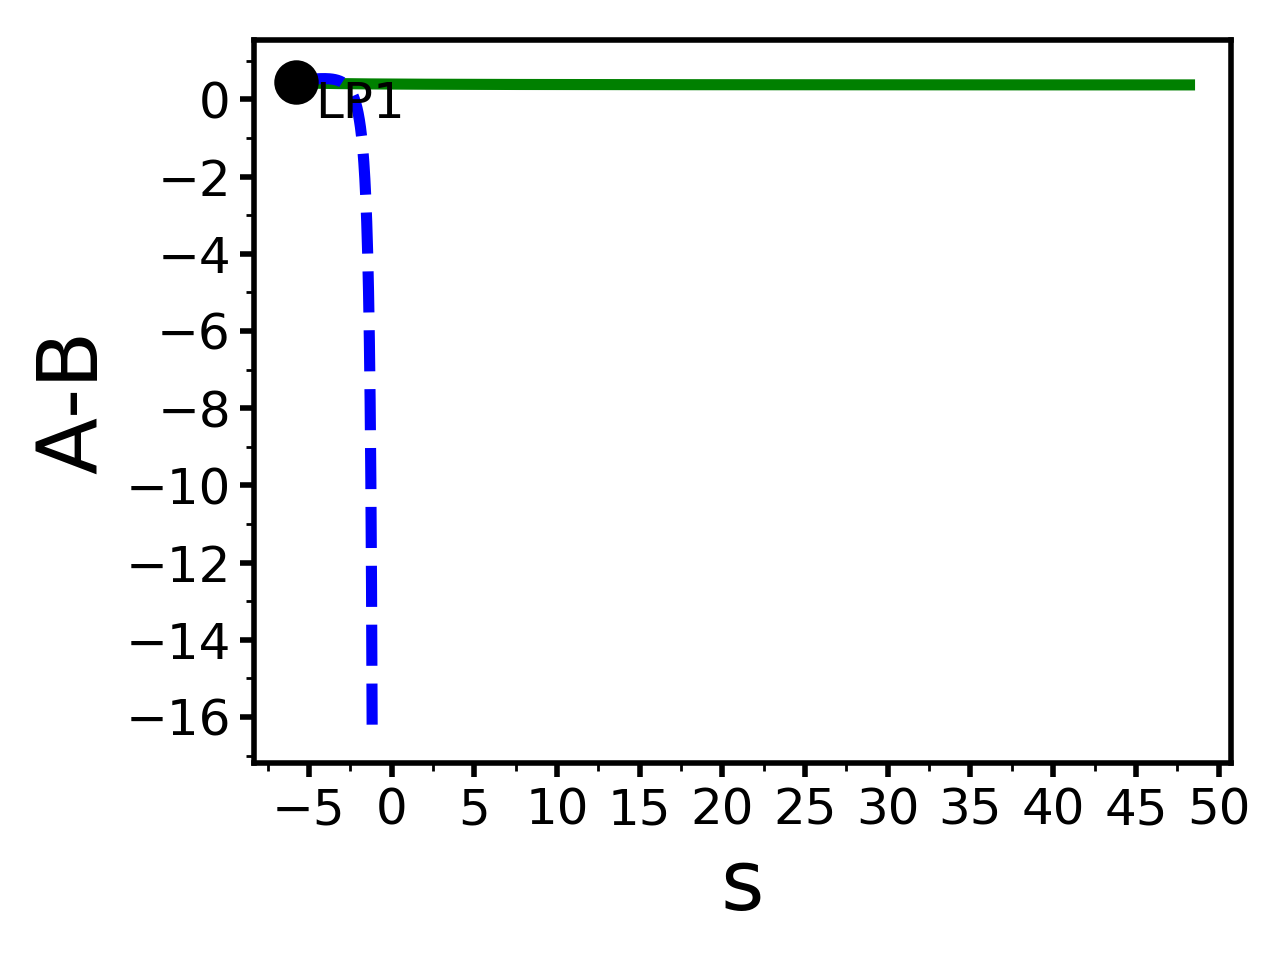

In [17]:
bifurcation1 = model4.bifurcation('s','A-B')

Our new bifurcation plot lets us see what happens to fixed points in the system as we vary a control parameter, in this case the cross-inhibitory stop-signalling rate between bees, $s$. We have also chosen not to observe a single reactant as our state variable, but rather the difference between two of them; this makes sense because in decision-making we care about the difference in votes for options

Our plot shows the location of fixed points, and they are either depicted as *stable* (solid line) or *unstable* (dashed line). Where the stability of fixed points changes, or fixed points appear of dissappear, these are referred to as *bifurcation points*. Using the interactive `bifurcation` plot above see if you can reproduce the bifurcation diagrams shown in figure 5(i) and 5(ii) of [Pais et al. (2013)](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0073216)

Figure 5(iii) of [Pais et al. (2013)](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0073216) requires us to specify a different bifurcation parameter...

<IPython.core.display.Javascript object>


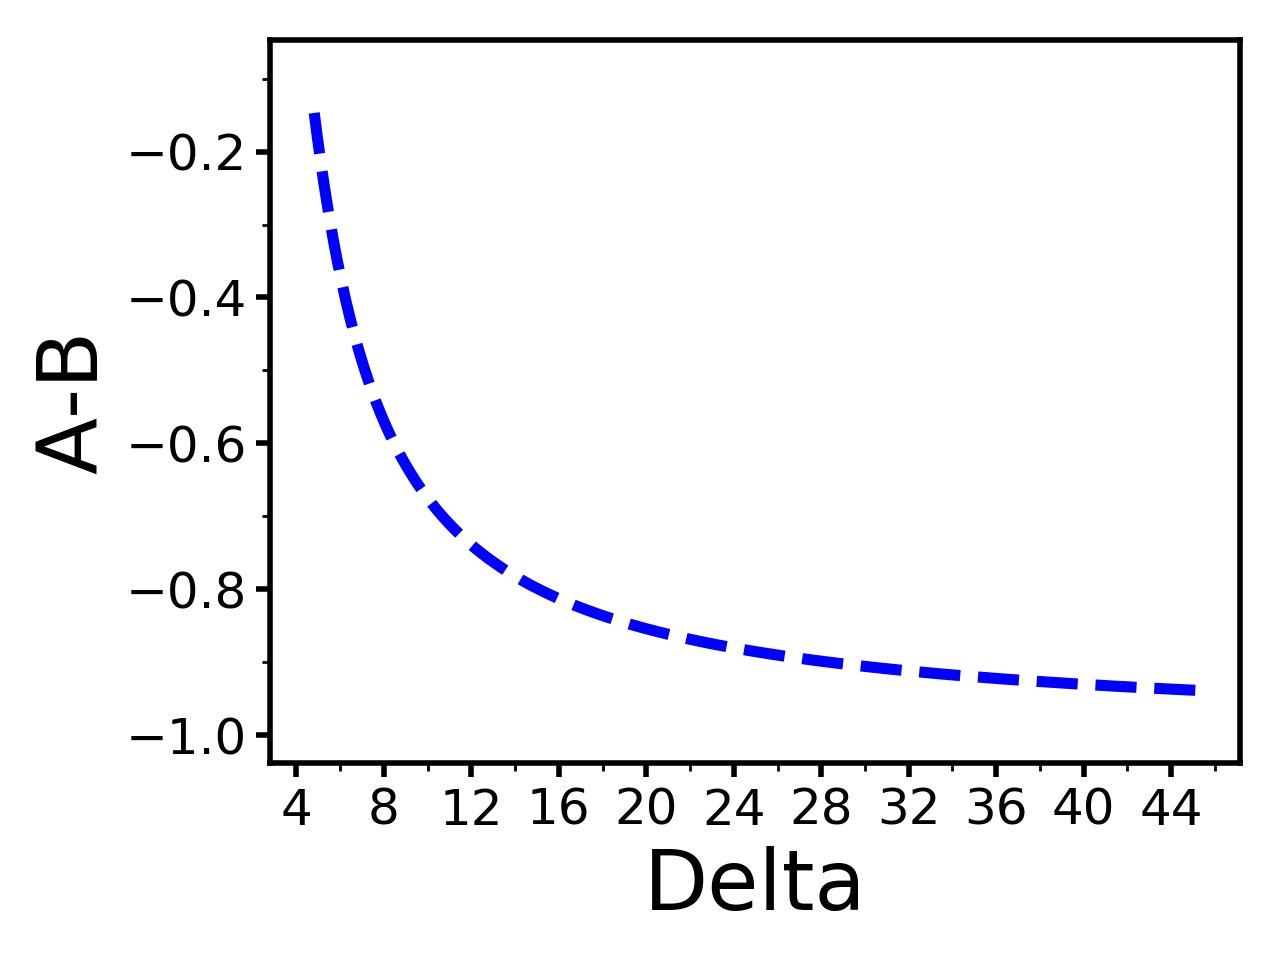

In [18]:
bifurcation2 = model4.bifurcation('\Delta','A-B')

## The effects of finite system size

The ODE models we have been looking at based on our model are very useful, but they represent an idealised scenario; they describe the behaviour of a system with infinitely many components or, to put it another way, the expected behaviour of the system, minus any noise

Noise is very important in collective behavour systems, however, and can have a variety of causes. The first cause we will consider is noisy fluctuations from the infinite population ideal, caused by having a much smaller, finite, population. To begin analysing the noise in our system, dependent on its size, we can deploy two main techniques; stochastic simulation, and statistical physics

We will return to stochastic simulation later, concentrating first on statistical physics analysis. As you might imagine, the maths involved in a statistic physics analysis is very advanced, based on deriving and then analysing the *Master Equation*; fortunately MuMoT automates this analysis for you

Brace yourself, this might look intimidating...

In [19]:
model4.showMasterEquation()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

You really don't need to understand the equation above, but it's nice to know that MuMoT generated it for you, isn't it? The Master Equation describes the probabilities of different transitions between system states. We are particularly interested in it because we can use it to derive the infinite population behaviour of the system (the ODEs we already saw), but also the noise around that. This is done by applying a technique called the *van Kampen expansion* [van Kampen, 2007)](#references), to approximate the *Focker-Planck equation*. In the *Advanced users* section at the end of this manual you'll be able to look at these equations, if you dare, to convince yourself that MuMoT is doing some clever stuff for you

But what is this clever stuff useful for? Well, for one thing, it lets us see approximately what the effects of noise, caused by finite system size, are in terms of deviations from the fixed points of the system...

In [20]:
#stream2 = model4.stream('A','B', showFixedPoints = True, showNoise = True)

This new `stream` plot now lets us see how the system's expected state gets 'spread out' around the fixed points. Slide the system size slider to see how the extent of the spread depends on the number of components in the system; slide the other sliders to see how the shape of the noise changes, in a way we might not have guessed, as the parameters change.

The effects of noise in the `stream` plot above are based on mathematical approximations. Alternatively, we can simply simulate the behaviour of the system over time; MuMoT gives you easy access to an efficient and accurate simulator, the *Stochastic Simulation Algorithm* (or *Doob-Gillespie algorithm*) [(Gillespie, 1976)](#references)

## Spatial noise

## Going to a higher dimension
Our first model ended up being 2-dimensional, after we realised that there were a constant number of components in the system. However MuMoT can work with higher-dimensional models (although not all features are supported for them; see [Supported features](#features)

## Non-constant system size
Not all models are of the kind studied above, in which there are a constant number of components. In open systems components can be created and destroyed, so the total size of the system can fluctuate over time, and in principle has no limits

A classic model from both ecology and chemistry is the *Lotka-Volterra* model; ecologists often think of this as representing two interacting populations, one of predators, and one of prey. Individuals are born and die in both populations. MuMoT enables this both via the `\emptyset` notation $\emptyset$, in which components spontaneously arise from nothing, or are destroyed, and via steady-state reactant populations, denoted with `()`, which do not change over time but simply persist at a constant size

Our Lotka-Volterra example is taken from Murray ([2002](#references), p124). Individuals are born into the prey population $X$ at a rate that depends on that population size, then predatory interactions decrease the prey population size and increase the predator population size. Finally, predators experience background mortality

In [21]:
%%model
$
(A) + X -> X + X : \alpha
X + Y -> Y + Y : \beta
Y -> \emptyset : \gamma
$

<IPython.core.display.Latex object>

In [22]:
model5 = mmt.parseModel(In[21])
model5.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [23]:
model5.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Note that there is no equation for $A$; since it is specified to be at a constant concentration, there is no equation for $A$'s change over time. This means that when we try and interact with the model, we will need to specify the constant value that $A$ should take

Also, since the system size is now no longer constant, as discussed above, it is now useful to be able to change the limits on the plot, to ensure that all the interesting behaviour of the system is visible...

<IPython.core.display.Javascript object>


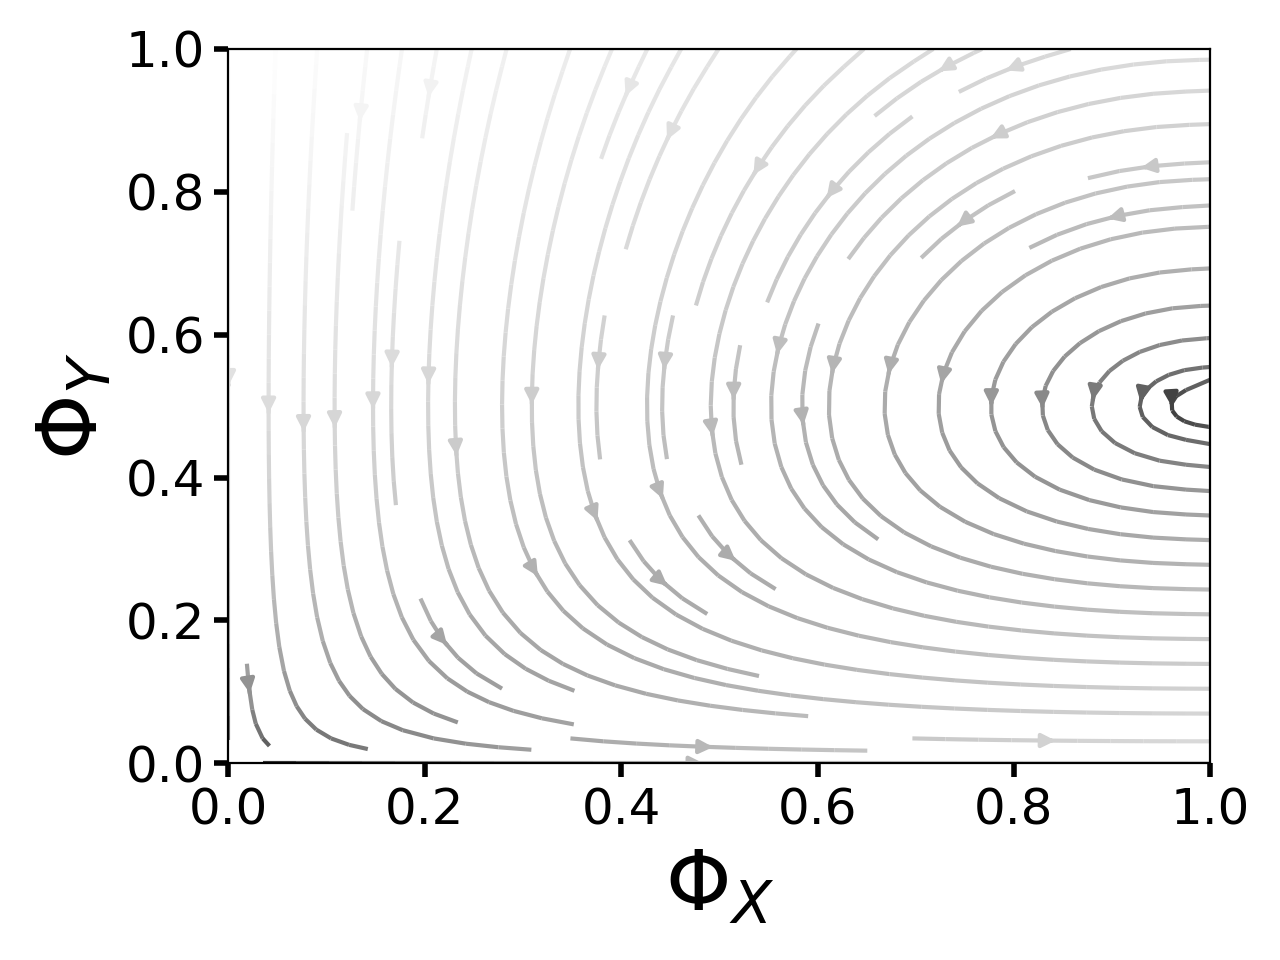

In [24]:
stream2 = model5.stream('X','Y', showFixedPoints = False)

## Bookmarking
<a id='bookmarking'></a>

If you find an interesting parameter set and want to preserve it, you can store those parameter values in a form that lets you reproduce your analysis. Simply click on the bookmark button underneath the sliders; you should see a message that a bookmark has been pasted to the logs, and instructions how to view it. Let's follow these instructions from our latest plot... click the bookmark button, then run the following command:

In [25]:
stream2.showLogs(tail = True)

Showing last 1 of 1 log entries:
Starting 2d stream plot with parameters (A=0.5), (alpha=0.5), (beta=0.5), (gamma=0.5), at 2017-11-03 16:52:20.000331


/Users/marshall/Google Drive/Home/Git/MuMoT/MuMoT/MuMoT.py:2491: RuntimeWarning: divide by zero encountered in log
  self._speed = np.log(np.sqrt(self._Xdot ** 2 + self._Ydot ** 2))


Now we need simply copy the last line of the log file, paste into a new cell, and replace `<modelName>` with the model we are working with, in this case `model5`. We will also give our new bookmarked view a name, so we can refer to it if we need to in the future...

<IPython.core.display.Javascript object>


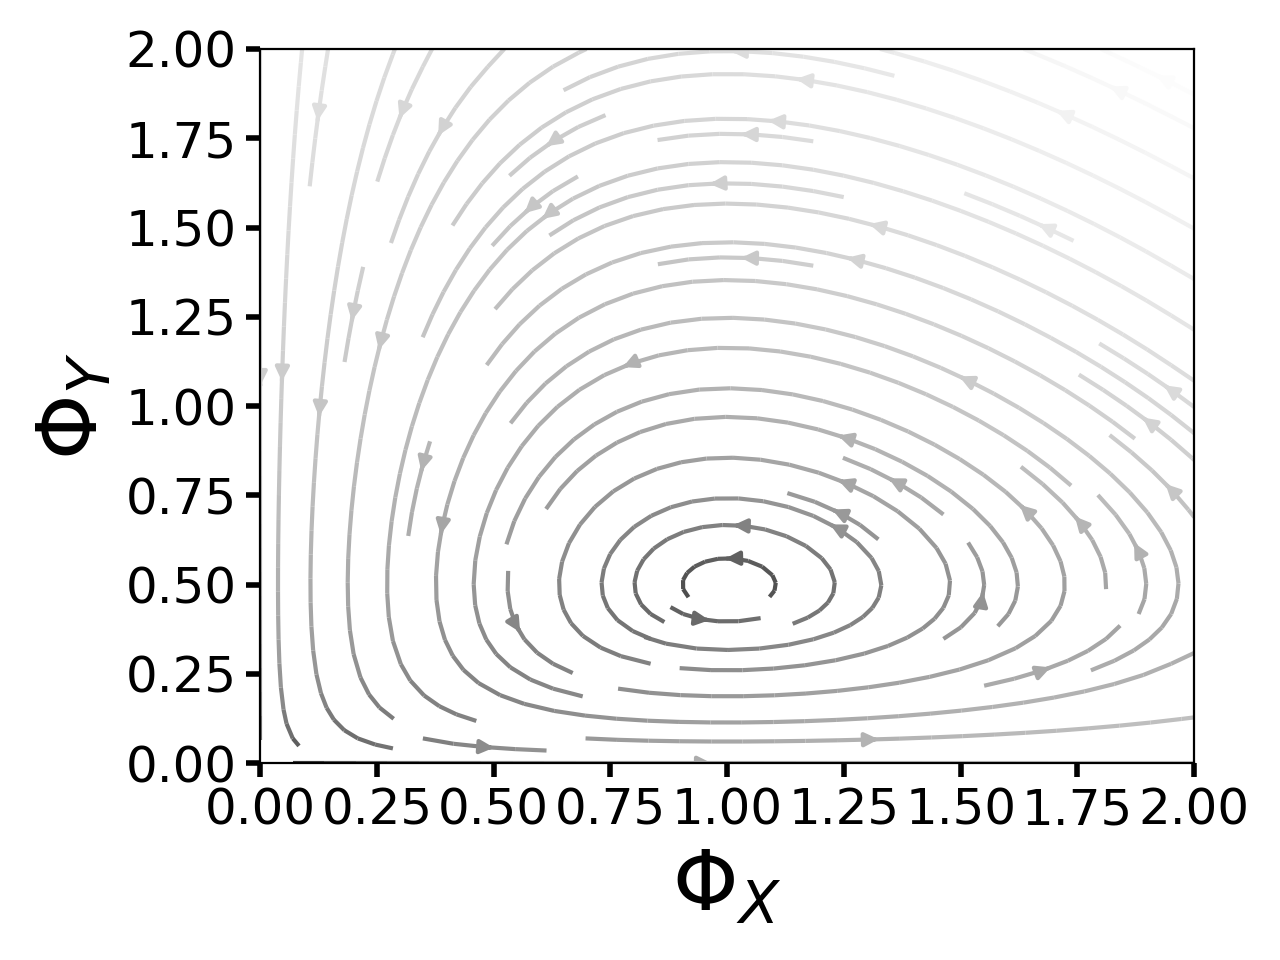

In [26]:
staticView1 = mmt.MuMoTstreamView(model5, None, 'X', 'Y', params = [('\\alpha', 0.5), ('A', 0.5), ('\\gamma', 0.5), ('\\beta', 0.5), ('plotLimits', 2.0), ('systemSize', 1)], showFixedPoints = False)

## Supported features
<a id='features'></a>
<table>
  <tr>
    <th>Command</th>
    <th>2d-system</th> 
    <th>3d-system</th>
  </tr>
  <tr>
    <td><code>stream</code></td>
    <td>&#10003;</td> 
    <td>&#10005;</td>
  </tr>
  <tr>
    <td><code>vector</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td>
  </tr>
</table>

## Command reference
<a id='comreference'></a>
Arguments in angle brackets are optional

Optional keywords are given with the default value they will have if not supplied

* `stream(stateVariable1, stateVariable2)`

    Display interactive stream plot of `stateVariable1` (x-axis) and `stateVariable2` (y-axis)

    *Keywords:* `showFixedPoints = False`, `showNoise = False`
* `vector(stateVariable1, stateVariable2, <stateVariable3>)`

    Display interactive vector plot of `stateVariable1` (x-axis) and `stateVariable2` (y-axis), and optionally `stateVariable3` (z-axis)

    *Keywords:* `showFixedPoints = False`, `showNoise = False`

## Advanced users

## Partial controllers

If you are creating a notebook to demonstrate a concept, it may be easiest to fix some of the parameters to ensure that the user can only vary the parameters you want them to. Partial controllers can be created by passing the standard commands a list `params` of parameter name, parameter value pairs. For example...

<IPython.core.display.Javascript object>


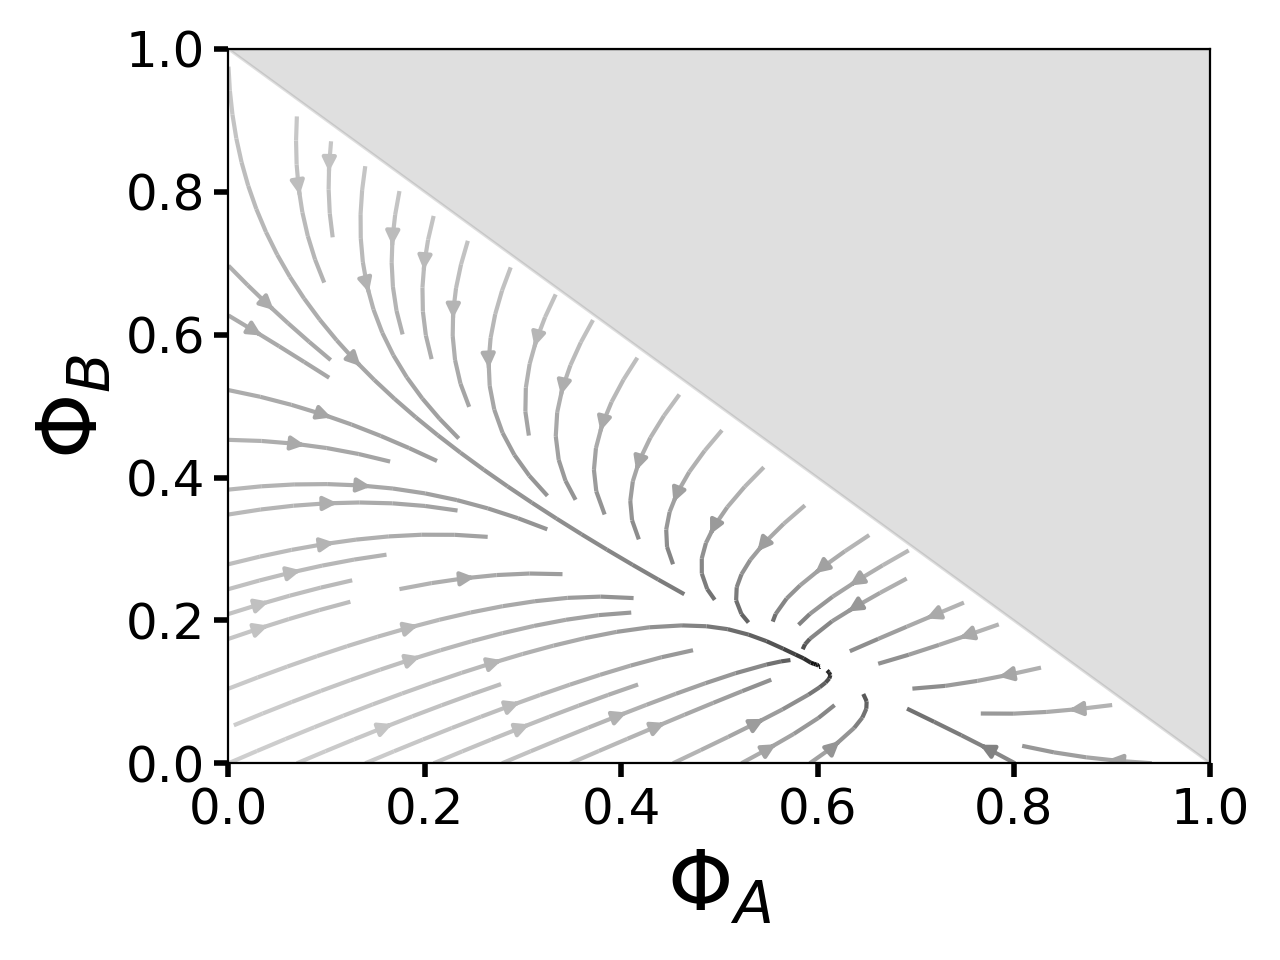

In [27]:
partial1 = model4.stream('A','B', params = [('\\mu',1)], showFixedPoints = False)

## Viewing the Master and Fokker-Planck equations

Just to make sure you really want to look at these, and because the size of the equations can slow down your browser, the following commands are commented. Uncomment then run if you want to see the gory details...

In [28]:
#model4.showVanKampenExpansion()

In [29]:
#model4.showFokkerPlanckEquation()

## References
<a id='references'></a>
* Gillespie, D. T. (1976). A general method for numerically simulating the stochastic time evolution of coupled chemical reactions. *Journal of Computational Physics* **22** (4): 403–434
* van Kampen, N. (2007) *Stochastic Processes in Physics and Chemistry (Third Edition)*. North-Holland
* Murray, J. D. (2002) *Mathematical Biology I. An Introduction (Second Edition)*. Springer